In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

DF = pd.read_csv('https://raw.githubusercontent.com/rusita-ai/pyData/master/product.csv')
DF.head()

,Date,meanPriceEach,totalOrder,orderType_1,orderType_2,orderType_3,totalBundle,bundleType_1,bundleType_2,customerType,FY,Country
0,2015-01-04,1.56,58065.35,10049.66,25228.37,3672.89,19114.43,17280.89,1833.54,Online,2015,25
1,2015-01-04,1.10,2578275.12,575245.44,1311502.53,181058.65,510468.50,429166.89,80986.81,Offline,2015,25
2,2015-01-11,1.17,2335986.11,560119.16,1032606.49,191515.19,551745.27,465764.93,85966.27,Offline,2015,25
3,2015-01-11,1.52,65483.08,14570.74,30445.75,3170.11,17296.48,16715.45,581.03,Online,2015,25
4,2015-01-18,1.65,52559.10,11415.28,25306.56,3345.08,12492.18,10971.43,1520.75,Online,2015,25


# column - country

In [92]:
x = DF[['Country']]
y = DF['customerType']

## Modeling

In [93]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=2045)

print('Train Data : ', x_train.shape, y_train.shape)
print('Test Data : ', x_test.shape, y_test.shape)

Model_dt = DecisionTreeClassifier(random_state = 2045)
Model_dt.fit(x_train, y_train)

y_hat_dt = Model_dt.predict(x_test)
y_hat_dt

Train Data :  (10506, 1) (10506,)
Test Data :  (4503, 1) (4503,)


array(['Online', 'Offline', 'Online', ..., 'Online', 'Offline', 'Offline'],
      dtype=object)

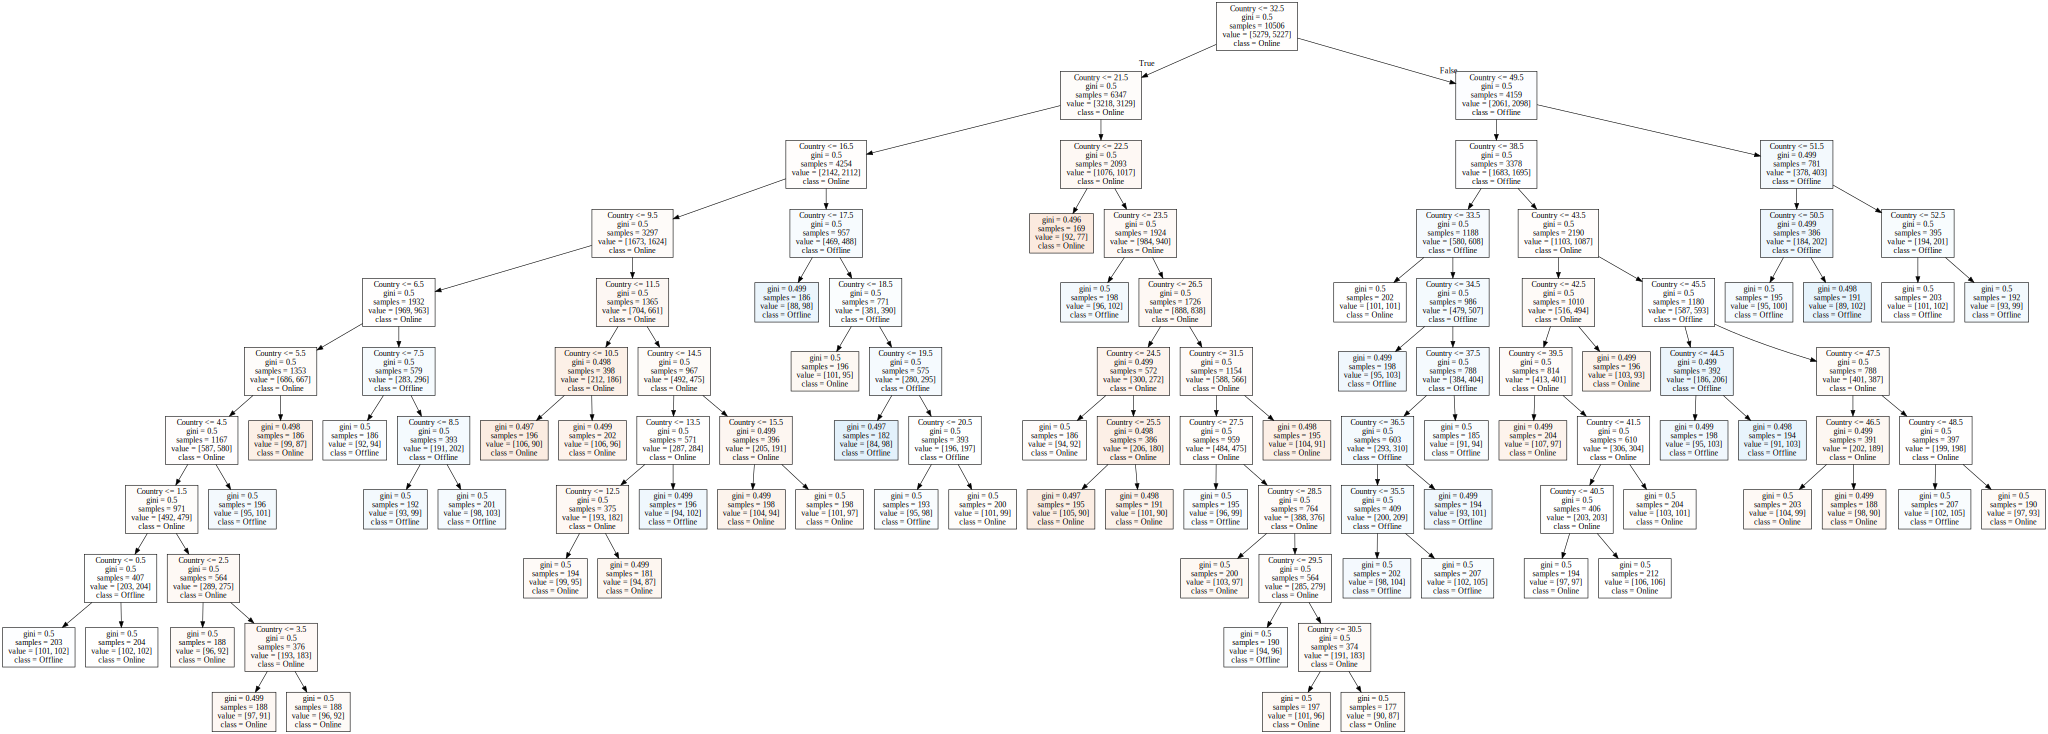

In [95]:
from sklearn.tree import export_graphviz
import graphviz

graphviz.Source(export_graphviz(Model_dt,
                                class_names = (['Online','Offline']),
                                feature_names = (['Country']),
                                filled=True))

In [96]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_hat_dt)

array([[1162, 1065],
       [1356,  920]])

In [97]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

dt_accuracy_score = accuracy_score(y_test, y_hat_dt)
dt_precision_score= precision_score(y_test, y_hat_dt, pos_label ='Offline')
dt_recall_score = recall_score(y_test, y_hat_dt, pos_label ='Offline')

print(dt_accuracy_score) 
print(dt_precision_score) 
print(dt_recall_score)

0.46235842771485675
0.4614773629864972
0.5217781769196228


In [100]:
from sklearn.metrics import f1_score

f1_score_dt = f1_score(y_test, y_hat_dt,pos_label ='Offline')
print(f1_score_dt)

0.4897787144362487


## 2) 가지치기

In [101]:
x = DF[['Country']]
y = DF['customerType']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=2045)

print('Train Data : ', x_train.shape, y_train.shape)
print('Test Data : ', x_test.shape, y_test.shape)

Model_dt_pr = DecisionTreeClassifier(max_depth = 3, random_state = 2045) 
Model_dt_pr.fit(x_train, y_train)

y_hat_dt_pr = Model_dt.predict(x_test)
y_hat_dt_pr

Train Data :  (10506, 1) (10506,)
Test Data :  (4503, 1) (4503,)


array(['Online', 'Offline', 'Online', ..., 'Online', 'Offline', 'Offline'],
      dtype=object)

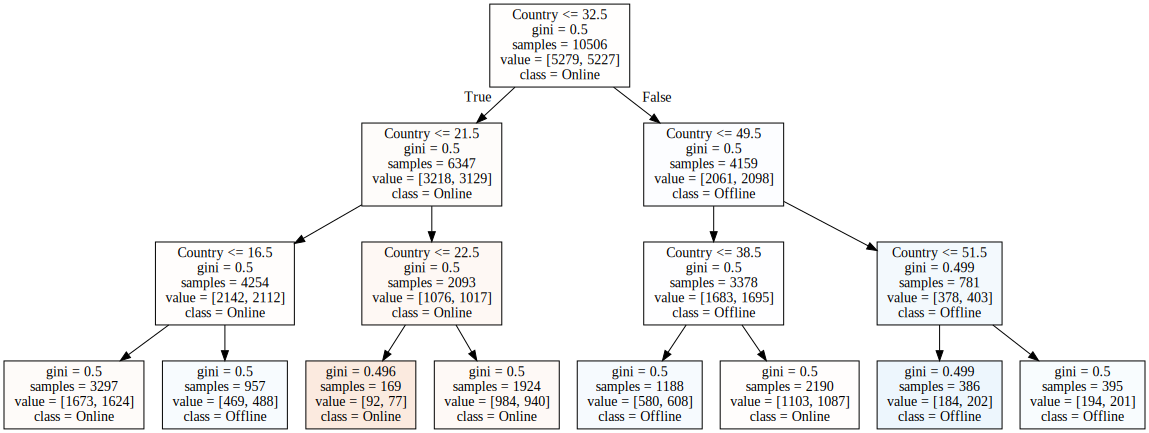

In [102]:
graphviz.Source(export_graphviz(Model_dt_pr,
                                class_names = (['Online','Offline']),
                                feature_names = (['Country']),
                                filled=True))

In [103]:
accuracy_score_dt_pr = accuracy_score(y_test, y_hat_dt_pr)
precision_score_dt_pr= precision_score(y_test, y_hat_dt_pr, pos_label ='Offline')
recall_score_dt_pr = recall_score(y_test, y_hat_dt_pr, pos_label ='Offline')

print(accuracy_score_dt_pr) 
print(precision_score_dt_pr) 
print(recall_score_dt_pr)

f1_score_dt_pr = f1_score(y_test, y_hat_dt_pr,pos_label ='Offline')
print(f1_score_dt_pr)

0.46235842771485675
0.4614773629864972
0.5217781769196228
0.4897787144362487


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


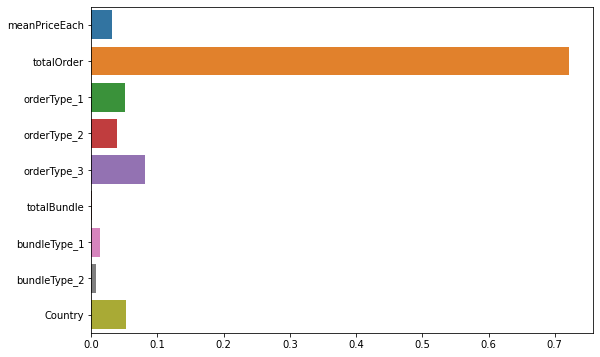

In [26]:
# plt.figure(figsize=(9,6))
# sns.barplot(Model_dt.feature_importances_,
#             ['meanPriceEach', 'totalOrder','orderType_1','orderType_2','orderType_3', 'totalBundle','bundleType_1','bundleType_2','Country'])
# plt.show()

# Drop_down = ['totalOrder','meanPriceEach','Country']

In [77]:
x = DF[['totalOrder','meanPriceEach','Country']]
y = DF['customerType']

In [86]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=2045)

print('Train Data : ', x_train.shape, y_train.shape)
print('Test Data : ', x_test.shape, y_test.shape)

Model_a = DecisionTreeClassifier(random_state = 2045) # romdom이 크게 필요하지는 x , criterion = 'entropy'로 바꿀 수 있다
Model_a.fit(x_train, y_train)

y_hat_a = Model_a.predict(x_test)
y_hat_a

Train Data :  (10506, 9) (10506,)
Test Data :  (4503, 9) (4503,)


array(['Online', 'Offline', 'Offline', ..., 'Offline', 'Online', 'Online'],
      dtype=object)

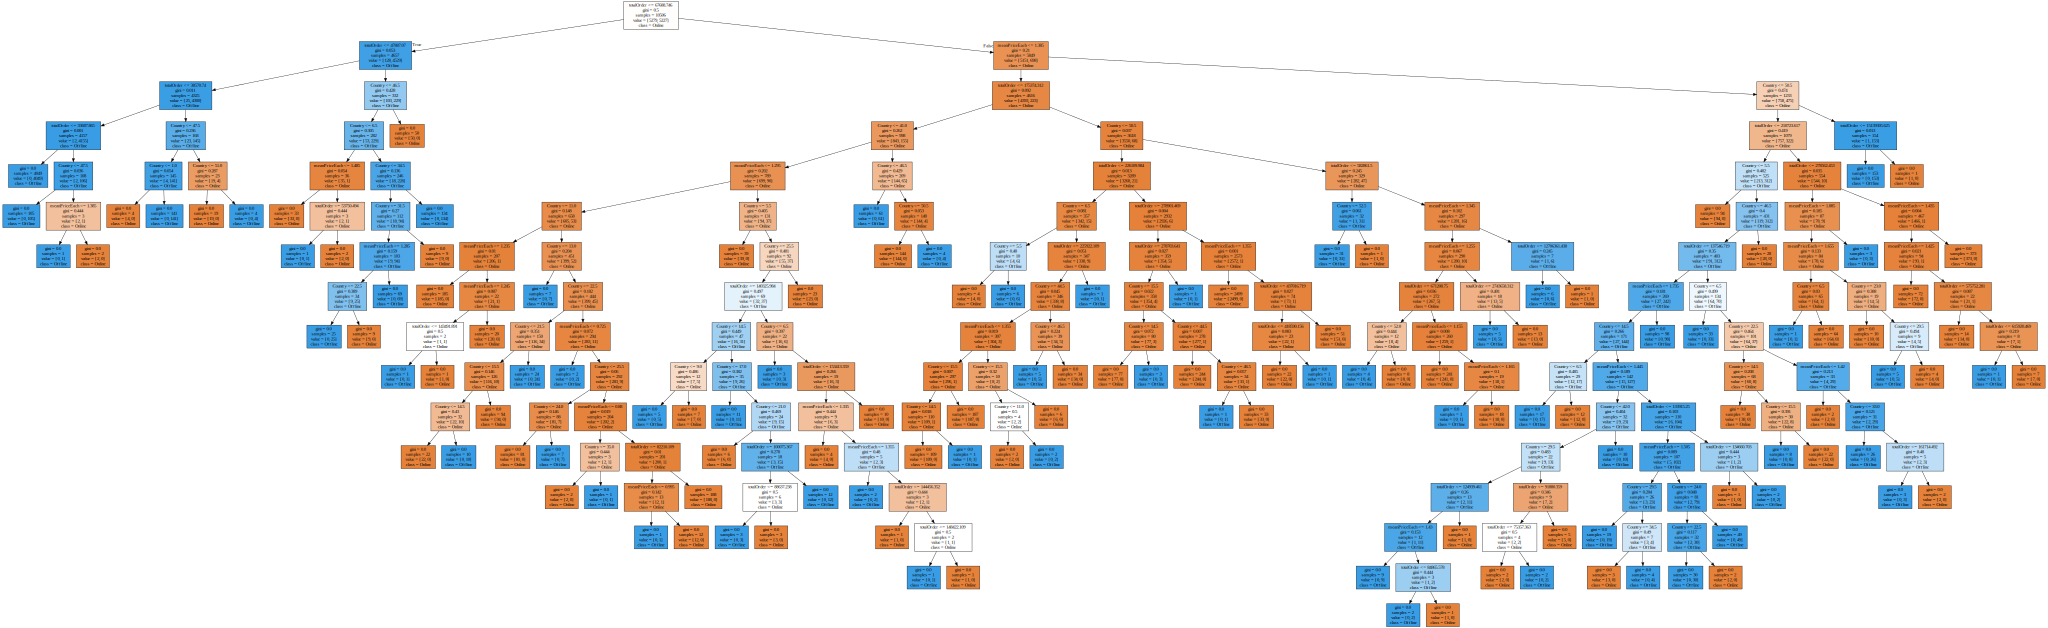

In [79]:
graphviz.Source(export_graphviz(Model_a,
                                class_names = (['Online','Offline']),
                                feature_names = (['totalOrder','meanPriceEach','Country']),
                                filled=True))

In [87]:
a_accuracy_score = accuracy_score(y_test, y_hat_a)
a_precision_score= precision_score(y_test, y_hat_a, pos_label ='Offline')
a_recall_score = recall_score(y_test, y_hat_a, pos_label ='Offline')

print(a_accuracy_score) 
print(a_precision_score) 
print(a_recall_score)

a_f1_score = f1_score(y_test, y_hat_a,pos_label ='Offline')
print(a_f1_score)

0.9862314012880302
0.9830432842481035
0.9892231701841042
0.9861235452103849


## 2) 가지치기

In [105]:
x = DF[['totalOrder','meanPriceEach','Country']]
y = DF['customerType']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=2045)

print('Train Data : ', x_train.shape, y_train.shape)
print('Test Data : ', x_test.shape, y_test.shape)

Model_a_pr = DecisionTreeClassifier(max_depth = 3, random_state = 2045) 
Model_a_pr.fit(x_train, y_train)

y_hat_a_pr = Model_a_pr.predict(x_test)
y_hat_a_pr

Train Data :  (10506, 3) (10506,)
Test Data :  (4503, 3) (4503,)


array(['Online', 'Offline', 'Offline', ..., 'Offline', 'Online',
       'Offline'], dtype=object)

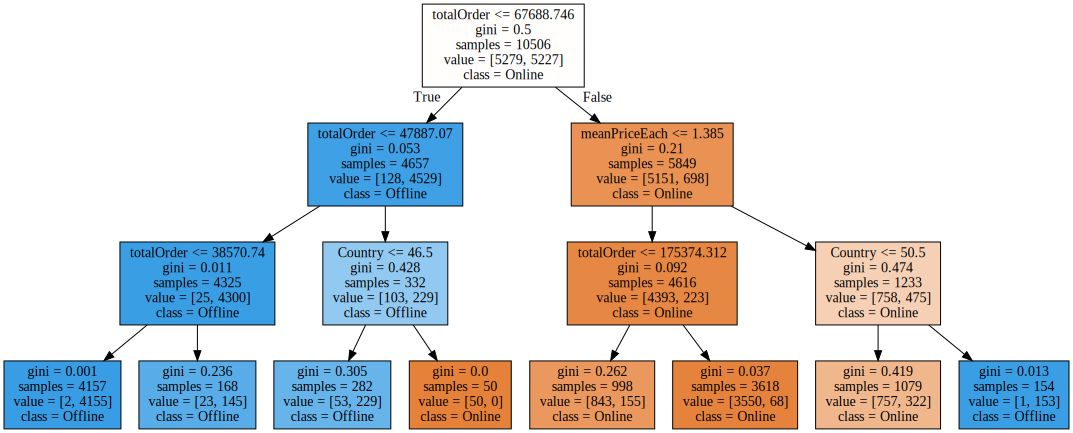

In [106]:
graphviz.Source(export_graphviz(Model_a_pr,
                                class_names = (['Online','Offline']),
                                feature_names = (['totalOrder','meanPriceEach','Country']),
                                filled=True))

In [107]:
accuracy_score_a_pr = accuracy_score(y_test, y_hat_a_pr)
precision_score_a_pr= precision_score(y_test, y_hat_a_pr, pos_label ='Offline')
recall_score_a_pr = recall_score(y_test, y_hat_a_pr, pos_label ='Offline')

print(accuracy_score_a_pr) 
print(precision_score_a_pr) 
print(recall_score_a_pr)

f1_score_a_pr = f1_score(y_test, y_hat_a_pr,pos_label ='Offline')
print(f1_score_a_pr)

0.9316011547856984
0.8908350305498982
0.9820386169735069
0.9342161469457496


In [ ]:
print(dt_accuracy_score) 
print(f1_score_dt)
print('-'*30)
print(accuracy_score_dt_pr) 
print(f1_score_dt_pr)
print('-'*30)

print(a_accuracy_score) 
print(a_f1_score)
print('-'*30)

print(accuracy_score_a_pr) 
print(f1_score_a_pr)